In [1]:
# Linear regression in one variable using gradient descent (alog with regularization)

In [2]:
import math, copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('Housing.csv')
area = data['area']
price = data['price']

print(area)
print(price)

a_m = np.mean(area)
p_m = np.mean(price)
print(a_m)
print(p_m)

area_scale = list(map(lambda x: (x)/1000, area))
price_scale = list(map(lambda x: (x)/100000, price))

x_train = np.array(area_scale)
y_train = np.array(price_scale)

print(x_train)
print(y_train)

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64
0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64
5150.54128440367
4766729.247706422
[ 7.42   8.96   9.96   7.5    7.42   7.5    8.58  16.2    8.1    5.75
 13.2    6.     6.55   3.5    7.8    6.     6.6    8.5    4.6    6.42
  4.32   7.155  8.05   4.56   8.8    6.54   6.     8.875  7.95   5.5
  7.475  7.     4.88   5.96   6.84   7.     7.482  9.     6.     6.
  6.55   6.36   6.48   6.     6.     6.     6.     6.6    4.3    7.44
  7.44   6.325  6.     5.15   6.     6.    11.44   9.     7.68   6.
  6.     8.88   6.24   6.36  11.175  8.88  13.2    7.7    6.    12.09
  4.     6.     5.02   6.6    4.04   4.26   6.42   6.5    5.7    6.
  6.     4.    10.5    6.  

In [4]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
def compute_cost (x,y,w,b):
    m=len(x)
    reg_p=0.1
    cost=0
    norm=0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    norm = w*w
    total_cost = 1 / (2 * m) * (cost + (reg_p * norm))
    return total_cost


In [6]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0

    reg_p = 0.1
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_dw = dj_dw + dj_dw_i 
        dj_db = dj_db + dj_db_i
    dj_dw = (dj_dw + (reg_p*w)) / m 
    dj_db = dj_db / m 
    return dj_dw, dj_db

In [7]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 

    # An list to store cost 
    # An list to store corresponding w and b
    cost_history = []
    parameter_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w , b)     
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:       
            cost_history.append( cost_function(x, y, w , b))
            parameter_history.append([w,b])
 
    return w, b, cost_history, parameter_history #return w and J,w history for graphing
  

In [8]:
w_init = 0
b_init = 0
iterations = 5000
tmp_alpha = 0.0001
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")
    


(w,b) found by gradient descent: (  8.0831,  2.9719)


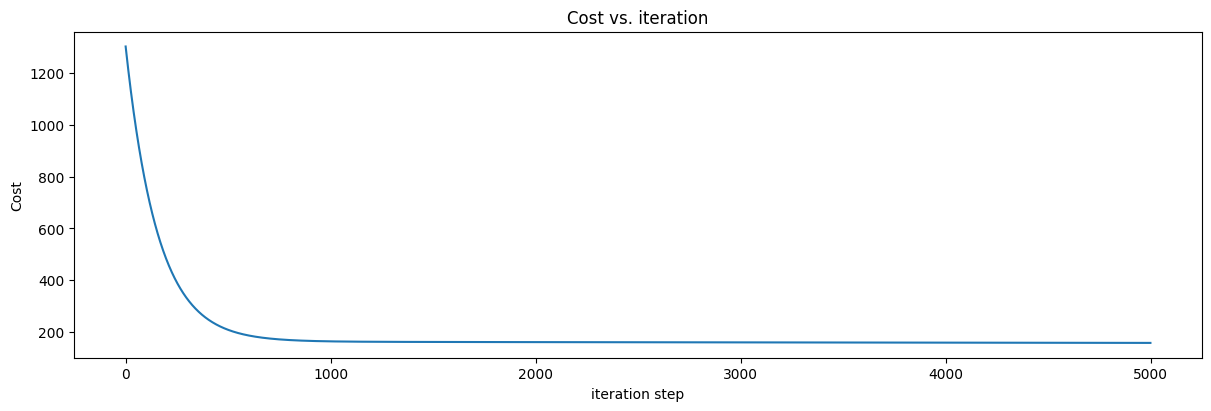

In [9]:
# in one graph
fig, ax = plt.subplots(constrained_layout=True, figsize=(12,4))
ax.plot(np.arange(len(J_hist)), J_hist)
ax.set_title("Cost vs. iteration")
ax.set_ylabel('Cost')
ax.set_xlabel('iteration step')
plt.show()

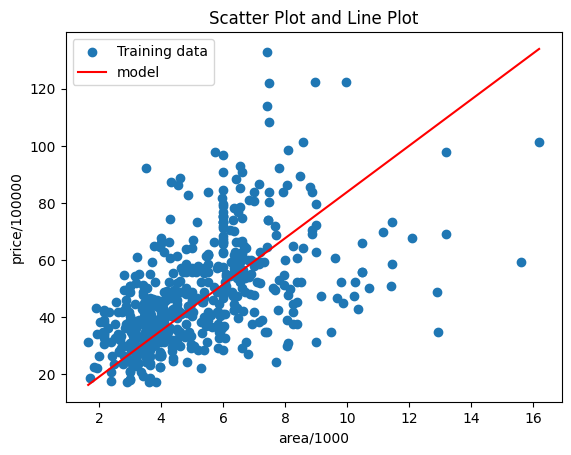

In [10]:
m = w_final
c = b_final

x_line = np.linspace(min(x_train), max(x_train), 100)
y_line = m * x_line + c

plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_line, y_line, color='red', label='model')
plt.xlabel('area/1000')
plt.ylabel('price/100000')
plt.title('Scatter Plot and Line Plot')
plt.legend()

plt.show()


In [11]:
m = w_final
c = b_final
x=float(input("Enter the area ofthe house: "))
y = m * (x/1000) + c
print("predicted price is :",y*100000)

Enter the area ofthe house:  2345


predicted price is : 2192691.4780221134


In [14]:
def calculate_rmse(predicted, actual):
    squared_errors = (predicted - actual) ** 2
    mean_squared_error = np.mean(squared_errors)
    rmse = np.sqrt(mean_squared_error)
    return rmse
predicted_prices = w_final * (x_train) + b_final
rmse = calculate_rmse(predicted_prices, price)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 5.11989964630798
